In [1]:
from minority_report.clean_data import CleanData
from minority_report.scaling import Scaling

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

#from scipy.interpolate import griddata

In [2]:
df = Scaling()
df.load_data()

,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,suspect_race,suspect_sex,latitude,longitude,metro,victim_age,victim_race,victim_sex,period,borough,patrol_borough
0,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,BLACK,M,40.664239,-73.908425,NOT SUBWAY,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH
1,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.644590,-73.892672,NOT SUBWAY,45-64,BLACK,F,2012-03-17 10:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
2,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,BLACK,M,40.658758,-73.942435,NOT SUBWAY,18-24,BLACK,M,2016-10-27 13:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
3,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,M,40.722364,-73.851474,NOT SUBWAY,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH
4,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.793465,-73.968950,NOT SUBWAY,45-64,WHITE,F,2013-12-11 13:00:00,MANHATTAN,PATROL BORO MAN NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983202,109,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,M,40.785050,-73.856852,NOT SUBWAY,25-44,ASIAN / PACIFIC ISLANDER,F,2018-12-02 04:00:00,QUEENS,PATROL BORO QUEENS NORTH
6983203,25,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,BLACK,F,40.801717,-73.937283,NOT SUBWAY,25-44,BLACK,M,2018-01-20 00:00:00,MANHATTAN,PATROL BORO MAN NORTH
6983204,41,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,FRONT OF,STREET,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.814612,-73.903637,NOT SUBWAY,25-44,BLACK HISPANIC,F,2018-08-03 22:00:00,BRONX,PATROL BORO BRONX
6983205,107,FRAUDS,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,U,40.724699,-73.808549,NOT SUBWAY,18-24,ASIAN / PACIFIC ISLANDER,M,2018-12-10 11:00:00,QUEENS,PATROL BORO QUEENS SOUTH


In [ ]:
#df.data['coord'] = [(lon, lat) for lon, lat in zip(df.data['longitude'], df.data['latitude'])]

In [3]:
inf = df.data['period'] > datetime(2016, 10, 1, 0, 0, 0)
sup = df.data['period'] < datetime(2016, 11, 1, 0, 0, 0)
sample = df.data[ inf & sup ]

In [ ]:
#np.sort(sample['period'].unique())

In [ ]:
ind = {time:index for index,time in enumerate(np.sort(sample['period'].unique()))}

sample['time_index'] = sample['period'].map(ind)

In [ ]:
len(sample['time_index'].unique())

In [ ]:
lon = np.array(sample['longitude'])
lat = np.array(sample['latitude'])
#coord = np.array(sample['coord'])
time_index = np.array(sample['time_index'])

# matlab griddata

In [ ]:
X, Y = np.meshgrid([1,2,3], [2,5,6,8])
XI,YI = np.meshgrid([1,2,3],[4,5,6,7])

In [ ]:
X

In [ ]:
Y

In [ ]:
XI

In [ ]:
YI

In [ ]:
test = griddata((X.ravel(),Y.ravel()), (X**2+Y**2).ravel(), (XI, YI))
test

In [ ]:
(X**2+Y**2).ravel()

In [ ]:
nx, ny = (3, 2)

In [ ]:
ny

In [ ]:
x = np.linspace(0, 1, nx)

y = np.linspace(0, 1, ny)

In [ ]:
x

In [ ]:
y

In [ ]:
xv, yv = np.meshgrid(x, y)

xv
array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

yv
array([[0.,  0.,  0.],
       [1.,  1.,  1.]])

xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays

xv
array([[0. ,  0.5,  1. ]])

yv
array([[0.],
       [1.]])

# Test griddata

In [ ]:
lon_values = np.linspace(-74.25559136315213,-73.70000906387347, 250)
lat_values = np.linspace(40.49611539518921, 40.91553277600008, 250)
time_values = np.linspace(0, sample.shape[0], sample.shape[0])

In [ ]:
# griddata ( à quelle position je le mets (lon, lat), dans quels arrays je le mets(np.zeros))
xq,yq, zq = np.meshgrid(lon_values,lat_values, time_values)


In [ ]:
values = np.ones((len(lon)))
values

In [ ]:
result = griddata((lon, lat,time_index), values, (xq, yq, zq))

# Manually

In [ ]:
grid_offset = np.array([0, -74.25559136315213, 40.49611539518921]) # Where do you start
grid_spacing = np.array([1, 0.001, 0.001]) # What's the space you consider (euclidian here)

In [ ]:
# point in continuous coordinate space
(x1,y1,z1) = (lon[0], lat[0], time_index[0])
(x2,y2,z2) = (lon[1], lat[1], time_index[1])
(x3,y3,z3) = (lon[2], lat[2], time_index[2])
values = np.array([[x1,y1,z1], [x2,y2,z2], [x3,y3,z3]])
print(values)

In [ ]:
# Convert point to index
indexes = np.round((values - grid_offset)/grid_spacing).astype('int')
indexes

In [ ]:
a = np.zeros((5000,5000, 1000))

In [ ]:
X = indexes[:,0]
Y = indexes[:,1]
Z = indexes[:,2]
X,Y,Z

In [ ]:
a[X,Y,Z]=1

In [ ]:
# point in continuous coordinate space
coords = np.array([(t_ind, lon, lat) for t_ind, lon, lat \
                   in zip(sample['time_index'],sample['longitude'],sample['latitude'])])

In [ ]:
coords

In [ ]:
indexes = np.round((coords - grid_offset)/grid_spacing).astype('int')
indexes

In [ ]:
indexes[:,0].max(), indexes[:,1].max(), indexes[:,2].max()

In [ ]:
a = np.zeros((indexes[:,0].max()+1, indexes[:,1].max()+1, indexes[:,2].max()+1))

In [ ]:
a.shape

In [ ]:
# Convert back index to grid coordiantes
print(grid_offset + indexes * grid_spacing)

In [27]:
def from_coord_to_matrix(df):
    
    #add 'time_index' column to df
    ind = {time:index for index,time in enumerate(np.sort(df['period'].unique()))}
    df['time_index'] = df['period'].map(ind)
    
    #initiate matrix
    grid_offset = np.array([0, -74.25559136315213, 40.49611539518921]) # Where do you start
    grid_spacing = np.array([1, 0.005, 0.005]) # What's the space you consider (euclidian here)
    
    #get points coordinates
    coords = np.array([(t_ind, lon, lat) for t_ind, lon, lat \
                   in zip(df['time_index'],df['longitude'],df['latitude'])])
    
    # Convert point to index
    indexes = np.round((coords - grid_offset)/grid_spacing).astype('int')
    
    #virgin matrix
    a = np.zeros((indexes[:,0].max()+1, indexes[:,1].max()+1, indexes[:,2].max()+1))
    Z = indexes[:,0]
    X = indexes[:,1]
    Y = indexes[:,2]
    
    a[Z, X, Y]=1
    return a

In [5]:
def from_matrix_to_coord(indexes):
    grid_offset = np.array([0, -74.25559136315213, 40.49611539518921]) # Where do you start
    grid_spacing = np.array([1, 0.001, 0.001]) # What's the space you consider (euclidian here)
    result = grid_offset + indexes * grid_spacing
    return result

In [28]:
img = from_coord_to_matrix(sample)

<ipython-input-27-2ed901716581>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_index'] = df['period'].map(ind)


In [ ]:
img[0]

In [29]:
img.shape

(743, 112, 84)

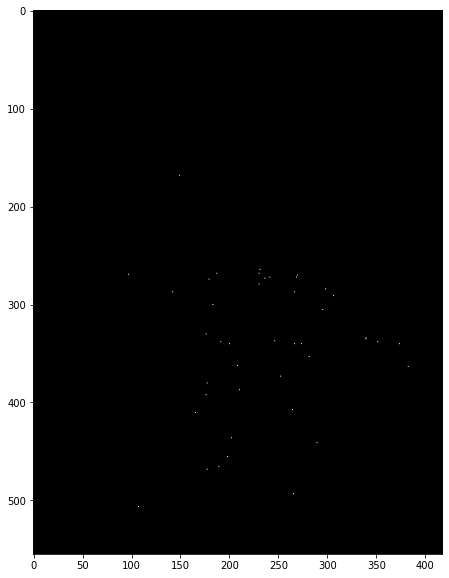

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(img[3], cmap='gray')

In [ ]:
img[0].shape

In [ ]:
img.shape

In [22]:
img3D_conv = gaussian_filter(img, sigma=(3,2.5,2.5))

plt.figure(figsize=(10,10))
plt.imshow(img3D_conv[3], cmap='gray')

In [ ]:
ind = {time:index for index,time in enumerate(np.sort(df.data['period'].unique()))}
df.data['time_index'] = df.data['period'].map(ind)

In [ ]:
data_img = from_coord_to_matrix(df.data)

In [ ]:
all_img = gaussian_filter(data_img, sigma=(3,2,2))